In [2]:
import pandas as pd

#données brutes
donnees = pd.read_csv('data_set.csv')

# Aperçu des premières lignes
print(donnees.head())

# Vérifier les dimensions du dataset
donnees.shape



   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


(1338, 7)

In [3]:
# Vérification des doublons
print(donnees.duplicated().sum())

# Suppression des doublons
donnees = donnees.drop_duplicates()

# Vérifier les dimensions après suppression
donnees.shape


1


(1337, 7)

In [4]:
# Vérification des valeurs manquantes
print("Résumé des valeurs manquantes par colonne :")
print(donnees.isnull().sum())



Résumé des valeurs manquantes par colonne :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
# Vérification des types de données avant conversion
print(donnees.dtypes)

# Conversion des colonnes catégoriques en type 'category'
colonnes_categoriques = donnees.select_dtypes(include=['object']).columns
donnees[colonnes_categoriques] = donnees[colonnes_categoriques].astype('category')

# Vérification des types de données après conversion
print("\nAprès conversion des colonnes catégoriques :")
print(donnees.dtypes)


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Après conversion des colonnes catégoriques :
age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


In [6]:
# Renommer les colonnes pour plus de clarté pour la présentation
donnees.rename(columns={
    'age': 'Âge',
    'sex': 'Sexe',
    'bmi': 'IMC',
    'children': 'Enfants',
    'smoker': 'Fumeur',
    'region': 'Région',
    'charges': 'Frais'
}, inplace=True)

# Vérification des noms de colonnes
print(donnees.columns)


Index(['Âge', 'Sexe', 'IMC', 'Enfants', 'Fumeur', 'Région', 'Frais'], dtype='object')


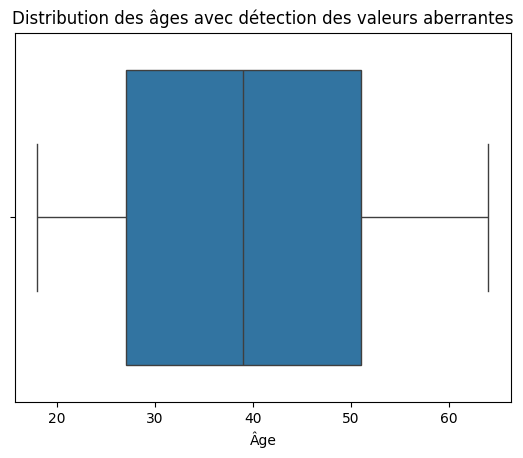

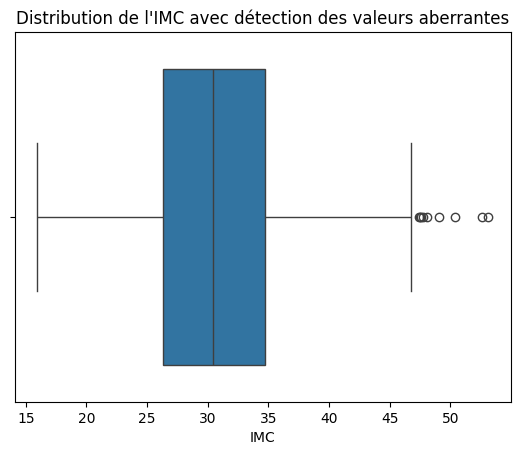


Dimensions après suppression des valeurs aberrantes pour l'IMC : (1328, 7)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot pour l'âge
sns.boxplot(x=donnees['Âge'])
plt.title("Distribution des âges avec détection des valeurs aberrantes")
plt.show()

# Boxplot pour l'IMC
sns.boxplot(x=donnees['IMC'])
plt.title("Distribution de l'IMC avec détection des valeurs aberrantes")
plt.show()

# Pour exclure les valeurs aberrantes (exemple pour l'IMC) j'ai utilisé la méthode de l'écart interquartile 
q1 = donnees['IMC'].quantile(0.25)
q3 = donnees['IMC'].quantile(0.75)
iqr = q3 - q1
borne_inferieure = q1 - 1.5 * iqr
borne_superieure = q3 + 1.5 * iqr

# Filtrer les valeurs aberrantes
donnees = donnees[(donnees['IMC'] >= borne_inferieure) & (donnees['IMC'] <= borne_superieure)]
print("\nDimensions après suppression des valeurs aberrantes pour l'IMC :", donnees.shape)


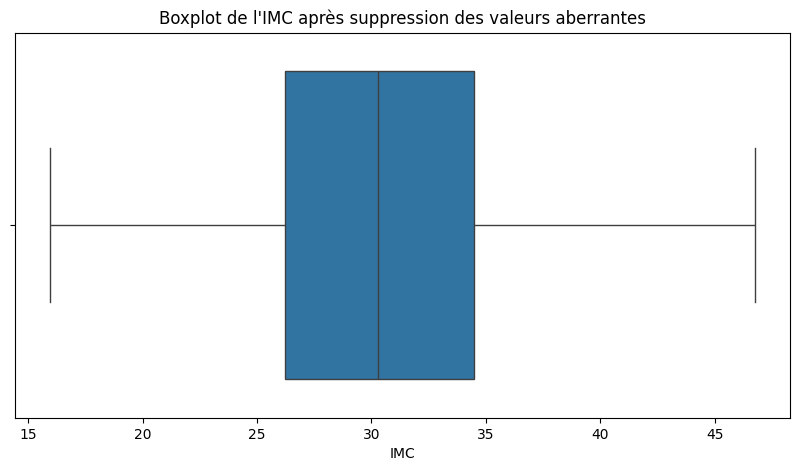

In [8]:
# Visualiser les données après suppression des valeurs aberrantes
plt.figure(figsize=(10, 5))
sns.boxplot(x=donnees['IMC'])
plt.title("Boxplot de l'IMC après suppression des valeurs aberrantes")
plt.show()


In [9]:
# Sauvegarder les données nettoyées
fichier_nettoyer = 'data_nettoyer.csv'
donnees.to_csv(fichier_nettoyer, index=False)
print(f"Fichier nettoyé sauvegardé sous : {fichier_nettoyer}")


Fichier nettoyé sauvegardé sous : data_nettoyer.csv
